<a href="https://colab.research.google.com/github/BrandonBosire/WEEK2IP/blob/main/BRANDON_BOSIRE_DS_Week_2_Independent_Project_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FINANCIAL INCLUSIVITY MODELLING.
What follows below is an analysis of datasets that are to be assessed inorder to allow the creation of a predictive model that can identify key driving  components( or factors) that correlate to greater Financial Technology incoorporations.

###The DATA:
The dataset to be analyzed is a Financial Dataset [http://bit.ly/FinancialDataset]. It includes data metrics from four East African countries ( Kenya, Uganda , Rwanda, Tanzania).It's primary focus is bank account and cellphone access level for interviewed persons who were also asked questions that formed the rest of the variables:
It is an excel format datatable that has thirteen columns and twenty three thousand five hundred and twenty five rows.The attributes are as follows:

-country -(Country interviewee is in.)

-year -(Year survey was done in.)

-unique id - (Unique identifier for each interviewee)

-location type -(Type of location: Rural, Urban)

-cellphone access -(If interviewee has access to a cellphone: Yes, No)

-household size -(Number of people living in one house)

-Age of respondent -(The age of the interviewee)

-gender of respondent - (Gender of interviewee: Male, Female)

-relationship with head - (The interviewees' relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know)

-maritial status - (The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don't know)

-education level - (Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA)

-job type - (Type of job interviewee has: Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer)

Prior to the analysis of the dataset, cleaning will be undertaken. Primarily this will involve the removal of duplicates ,removal of the uniqueid column and the changing of the datatypes respectively.

The next step will be the creation of new columns from the breaking of existing columns. From the relationship with head column,we will create a new column called head_of_household,this will state yes if the respondent is the head of the household.


To then ensure the validity of the data we will then identify duplications in the dataset ,removing all duplicates from the data.We will also be converting the year column to datetime datatypes.

After this, the data will be cleaned to sufficently.

##IMPORTING AND PROCESSING OF THE DATA

In [1]:
#First we will import all important libraries : Panda and Numpy.
#
#For optimum manipulation of large datasets:
import pandas as pd
#For manipulation of numeric array values:
import numpy as np 
#For plotting of variables:
import matplotlib.pyplot as plt 
#For more user friendly graphical presentaion of variables:
import seaborn as sns

In [2]:
# Upload the Dataset
df = pd.read_csv('/content/Financial Dataset - 1.csv')

In [3]:
# Upload the Dataset definitions
Variable_df = pd.read_csv('/content/VariableDefinitions.csv')

In [4]:
# Preview the Financial.csv Dataset.
df.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
#Preview the Variable Definitions csv.
Variable_df

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [6]:
# Getting to know more about the dataset by accessing its information

#To identify column names:
print(df.columns)
#To identify dataframe dimensions:
print(df.shape)
#To list the number of null values per column:
print(df.isnull().sum())

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')
(23524, 13)
country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64


In [7]:
#Checking if column names match variable definitions names:
Variable_df['Variable Definitions']

0                    country
1                       year
2                   uniqueid
3              location_type
4           cellphone_access
5             household_size
6          age_of_respondent
7       gender_of_respondent
8     relationship_with_head
9             marital_status
10           education_level
11                  job_type
Name: Variable Definitions, dtype: object

In [8]:
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [9]:
#Renaming columns to their corresponding Variable definitions names:
d={'Has a Bank account':'bank_access', 'Type of Location':'location_type','Cell Phone Access':'cellphone_access','Respondent Age':'age_of_respondent','The relathip with head':'relationship_with_head',
       'Level of Educuation':'education_level', 'Type of Job':'job_type'}
df.rename(columns = d, inplace = True)
df

,country,year,uniqueid,bank_access,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [10]:
#Checking column name changes
df.columns

Index(['country', 'year', 'uniqueid', 'bank_access', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [11]:
#Create a new column 'head_of_household'
#This column would identify whether the respondent was the head of the household or not.  
#Make'head_of_household' with True='Yes' and False='No'
df['head_of_household'] = df.loc[:,'relationship_with_head']
df['head_of_household'].replace('Head of Household','Yes', inplace=True)
df['head_of_household'].replace(to_replace=('Spouse','Other relative','Child','Parent' ,'Other non-relatives', 'Dont Know' ,'Spouse' ) , value='No' , inplace =True)
df

,country,year,uniqueid,bank_access,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,head_of_household
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,No
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,Yes
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,No
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,Yes
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income,Yes
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income,Yes
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income,No
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed,No


In [12]:
#checking for duplicates
df.duplicated().sum()

0

In [13]:
#Checking for null values ,after creating new columns.
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
bank_access               36
location_type             15
cellphone_access          11
household_size            28
age_of_respondent         34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
education_level           29
job_type                  30
head_of_household          4
dtype: int64

In [14]:
# To check if null values are replaced
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
bank_access               36
location_type             15
cellphone_access          11
household_size            28
age_of_respondent         34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
education_level           29
job_type                  30
head_of_household          4
dtype: int64

In [15]:
#Dropping the Unique id column 
df.drop('uniqueid', axis=1,inplace=True)
df.head(10)

,country,year,bank_access,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,head_of_household
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,No
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,Yes
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,No
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,Yes
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed,No
5,Kenya,2018,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed,No
6,Kenya,2018,No,Rural,Yes,7.0,32.0,Female,Spouse,Married/Living together,Primary education,Self employed,No
7,Kenya,2018,No,Rural,Yes,1.0,42.0,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government,Yes
8,Kenya,2018,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing,Yes
9,Kenya,2018,No,Urban,Yes,3.0,76.0,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent,Yes


In [16]:
#Checking column datatypes
df.dtypes

country                    object
year                        int64
bank_access                object
location_type              object
cellphone_access           object
household_size            float64
age_of_respondent         float64
gender_of_respondent       object
relationship_with_head     object
marital_status             object
education_level            object
job_type                   object
head_of_household          object
dtype: object

In [17]:
#Converting the Yes/No value columns into string datatypes
#As well as converting the year column to datetime datatype
#
convert_dict = {'bank_access': str,'cellphone_access': str ,'head_of_household': str}
df = df.astype(convert_dict)
df['year']=pd.to_datetime(df['year'])
df.dtypes

country                           object
year                      datetime64[ns]
bank_access                       object
location_type                     object
cellphone_access                  object
household_size                   float64
age_of_respondent                float64
gender_of_respondent              object
relationship_with_head            object
marital_status                    object
education_level                   object
job_type                          object
head_of_household                 object
dtype: object

In [18]:
#Exporting the cleaned dataset.
#
df.to_csv('Financial Modelling .csv')

##Descriptive Analysis
Now that the data has been cleaned , we can now beginthe relevant processes of descriptive analysis:This will be broken down into preparation, univariate , bivariate , multivariate and reduction.

In [19]:
#Importing the libraries:
#For optimum manipulation of large datasets:
import pandas as pd
#For manipulation of numeric array values:
import numpy as np 
#For plotting of variables:
import matplotlib.pyplot as plt 
#For more user friendly graphical presentaion of variables:
import seaborn as sns


In [20]:
#Mounting the dataset
dataset = pd.read_csv('/content/Financial Modelling .csv')
#Copying for use. 
data=dataset.copy()

In [21]:
data.columns

Index(['Unnamed: 0', 'country', 'year', 'bank_access', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'head_of_household'],
      dtype='object')

###Data preparation:
We will first follow the guiding steps below to ensure only the important data is used.

In [22]:
#Since the goal is to utilize only the overall use of fintech related data.
#The unnamed and year column are not relevant and can be omitted.
#
data.drop(['Unnamed: 0','year' ],axis=1,inplace=True)

###Identifying and removing null values.


In [23]:
#Viewing data
data
#Checking null values
data.isnull().sum()

country                   14
bank_access               36
location_type             15
cellphone_access          11
household_size            28
age_of_respondent         34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
education_level           29
job_type                  30
head_of_household          4
dtype: int64

In [24]:
data.isna().sum()

country                   14
bank_access               36
location_type             15
cellphone_access          11
household_size            28
age_of_respondent         34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
education_level           29
job_type                  30
head_of_household          4
dtype: int64

In [25]:
#Dropping rows with null values
#

data=data.dropna(axis=0)
data.isna().sum()

country                   0
bank_access               0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
head_of_household         0
dtype: int64

##Defining the question:
What are the characteristics that contribute the most to whether a person will have a bank account/ bank account access?

##Metric For Success
Being able to design a program that will have a high accuracy in identifying the persons who have bank account access.

##The context:
Our primary goal will be identify groupw where the proportions of bank access are high. By this I mean ,the ability to identify the groups of variables where bank access is positive. We will also have to filter out and identify only the person who have a source of income.

##Experimental Design
We will firstly filter to keep only the values where the respondee have a source of income.

Then we will analyse the corresponding variables to determine:

-Presence of missing values.

-Outliers

-The presence of anomalies.

Having done this we will carry out univariate, bivariate and multivariate analyses to identify trends,relationships. These will also assist in the premodelling conclusion we will draw. 

##Appropriateness of the data. 

It is worth noting that the data we have is relevant in assessing the probability of bank account access in the region.

In [26]:
#Outlier detection:
# We will filter data that contains No Income, Do not Know or Refused to answer as these will be our definitive outliers.

np.isin(data,['Dont know','RTA','Dont Know/Refuse to answer','No Income']).sum()
data = data[data.isin(['Dont know','RTA','Dont Know/Refuse to answer','No Income']) == False]

In [27]:
#Checking whether it was removed
np.isin(data,['Dont know','RTA','Dont Know/Refuse to answer','No Income']).sum()

0

In [28]:
#Missing values.
#missing values were detected and removed as they were not enough to cause significant change.


##Analysis:
We will now carry out the three levels of analysis.These being:

-Univariate analysis. 

-Bivariate analysis.

-Multivariate analysis.

##Univriate analysis.

We will now proceed to carry out univariate analysis. This will primarily include:

-Cross-Tabulation and frequency tables.

-Calculation central tendancies, dispersion of numerical data.

-Visualization using bar plots ,box plots and histograms.

-Finally we will make recommendations.

In [29]:
#Shape of our data
#Here the data has been filtered to only include the values for those who have a bank account.

datas=data[data['bank_access']=='Yes']

datas.shape

(3297, 12)

In [30]:
#Total number of values per column:

print(f'Country:{datas.country.count()}')
print(f'Bank access:{datas.bank_access.count()}')
print(f'Location Type:{datas.location_type.count()}')
print(f'Cellphone access:{datas.cellphone_access.count()}')
print(f'Household Size:{datas.household_size.count()}')
print(f'Age :{datas.age_of_respondent.count()}')
print(f'Gender:{datas.gender_of_respondent.count()}')
print(f'Relationship with head:{datas.relationship_with_head.count()}')
print(f'Maritial Status:{datas.marital_status.count()}')
print(f'Education Level:{datas.education_level.count()}')
print(f'Job Type:{datas.job_type.count()}')
print(f'Head of household:{datas.head_of_household.count()}')


Country:3297
Bank access:3297
Location Type:3297
Cellphone access:3297
Household Size:3297
Age :3297
Gender:3297
Relationship with head:3297
Maritial Status:3295
Education Level:3297
Job Type:3270
Head of household:3297


In [31]:
#Number of unique values per column(Categories):
print(f'Country:{datas.country.nunique()}')
print(f'Bank access:{datas.bank_access.nunique()}')
print(f'Location Type:{datas.location_type.nunique()}')
print(f'Cellphone access:{datas.cellphone_access.nunique()}')
print(f'Household Size:{datas.household_size.nunique()}')
print(f'Gender:{datas.gender_of_respondent.nunique()}')
print(f'Relationship with head:{datas.relationship_with_head.nunique()}')
print(f'Maritial Status:{datas.marital_status.nunique()}')
print(f'Education Level:{datas.education_level.nunique()}')
print(f'Job Type:{datas.job_type.nunique()}')
print(f'Head of household:{datas.head_of_household.nunique()}')

Country:4
Bank access:1
Location Type:2
Cellphone access:2
Household Size:17
Gender:2
Relationship with head:6
Maritial Status:4
Education Level:7
Job Type:8
Head of household:2


In [32]:
#Frequency table for each categorical data columns:
datas.country.value_counts().reset_index()


,index,country
0,Kenya,1520
1,Rwanda,997
2,Tanzania,599
3,Uganda,181


In [33]:
datas.location_type.value_counts().reset_index()


,index,location_type
0,Rural,1663
1,Urban,1634


In [34]:
datas.cellphone_access.value_counts().reset_index()


,index,cellphone_access
0,Yes,3193
1,No,104


In [35]:
datas.gender_of_respondent.value_counts().reset_index()


,index,gender_of_respondent
0,Male,1817
1,Female,1480


In [36]:
datas.relationship_with_head.value_counts().reset_index()


,index,relationship_with_head
0,Head of Household,2259
1,Spouse,695
2,Child,193
3,Parent,65
4,Other relative,65
5,Other non-relatives,20


In [37]:
datas.marital_status.value_counts().reset_index()


,index,marital_status
0,Married/Living together,1861
1,Single/Never Married,959
2,Widowed,243
3,Divorced/Seperated,232


In [38]:
datas.education_level.value_counts().reset_index()


,index,education_level
0,Primary education,1083
1,Secondary education,981
2,Tertiary education,590
3,Vocational/Specialised training,456
4,No formal education,176
5,Other/Dont know/RTA,6
6,6,5


In [39]:
datas.job_type.value_counts().reset_index()


,index,job_type
0,Self employed,844
1,Farming and Fishing,634
2,Formally employed Private,567
3,Informally employed,440
4,Formally employed Government,299
5,Remittance Dependent,240
6,Other Income,196
7,Government Dependent,50


In [40]:
datas.head_of_household.value_counts().reset_index()

,index,head_of_household
0,Yes,2259
1,No,1038


In [41]:
#Data information.
datas.describe()

,household_size,age_of_respondent
count,3297.000000,3297.000000
mean,3.558993,39.605702
std,2.215401,14.344172
min,0.000000,16.000000
25%,2.000000,29.000000
50%,3.000000,36.000000
75%,5.000000,48.000000
max,17.000000,95.000000


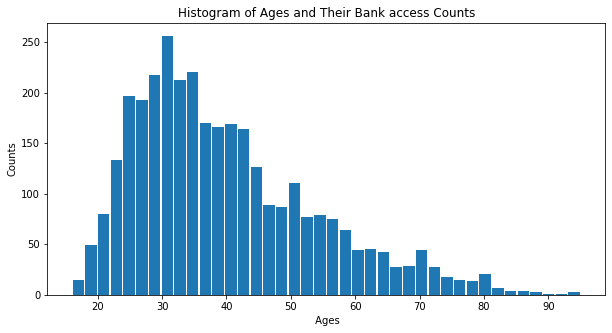

Ages Skew : 0.9357422832248766
Ages Skew : 0.46628468620455177


In [42]:
##Plotting to identify trend in ages 
age=datas.age_of_respondent
plt.figure(figsize=(10,5))
plt.hist(age, bins=40, histtype='bar', rwidth=0.9)
plt.xlabel(' Ages')
plt.ylabel('Counts')
plt.title('Histogram of Ages and Their Bank access Counts')
plt.show()

print('Ages Skew :',datas.age_of_respondent.skew())
print('Ages Skew :',datas.age_of_respondent.kurt())

From observation of the above, it is clear that the majority of the interviewees were majorly younger .It is also noted that the skew value corresponds with this being that it is high and positive.
The low value of kurtosis indicates that the graph contrary to apperance is close to normal distribution. 

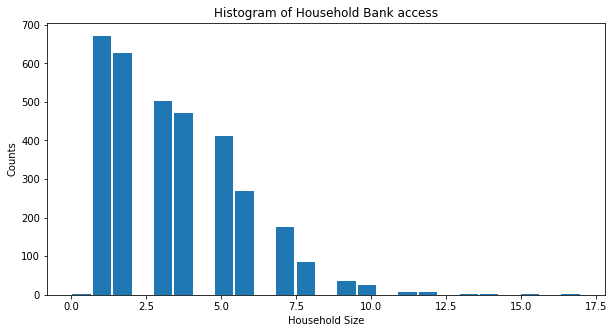

Household Skew : 0.9665707820353031
Household size Skew : 1.2489240274332838


In [43]:
#Trends with household sizes.
homes=datas.household_size
plt.figure(figsize=(10,5))
plt.hist(homes,bins=25,  histtype='bar', rwidth=0.9)
plt.xlabel('Household Size')
plt.ylabel('Counts')
plt.title('Histogram of Household Bank access')
plt.show()

print('Household Skew :',datas.household_size.skew())
print('Household size Skew :',datas.household_size.kurt())

Here we see that there is a large degree of concentration of values towards the left giving the skew value a strong positive.
We also note that the kutosis is greater than one making it leptokurtic and we can see that the left tail is very fat.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


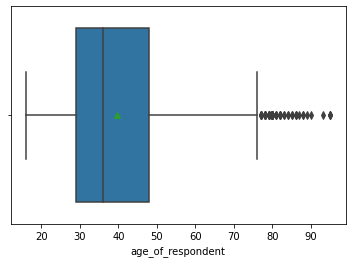

In [44]:
#Boxplot of both, to strengthen our conclusions
#Boxplot of Ages
sns.boxplot(datas['age_of_respondent'], showmeans=True)


An interesting situation has arisen as there are noteworthy outliers after the ages of 80 and as seen in the histplot, this was the reason for the long tail on the right of the graph

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


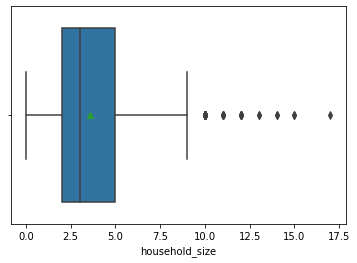

In [45]:
#Boxplot of Household size
sns.boxplot(datas['household_size'], showmeans=True)

The above boxplot shows that there is a great concentration of values around the mean as it was noted in the histplot the relatively high peak around a small mean range

###RECOMMENDATIONS:

From our preliminary univariate analysis of the major dividing factors and their occurence inregard to bank access.It is clear that the following should be targeted due to their higher levels of bank access:

-Males, farmers and fishing persons, self employeed ,married persons, head of households, particularly kenyans.This should also be tailored to a market where highest education level is primary school.


##Bivariate Analysis:
We will now proceed to carry out bivariate analysis. This will primarily include:

-Cross-Tabulation and frequency tables.

-Visualization using stacked bar plots ,scatter plots and line charts.

-Calculation of peaarson's correlation.


-Finally we will make recommendations.

In [46]:
#Sorting values to compare the counts for bank access across job types and country.
datas.groupby(['country','job_type']).size().sort_values(ascending=False).reset_index(name='Count')

,country,job_type,Count
0,Kenya,Self employed,364
1,Rwanda,Farming and Fishing,324
2,Kenya,Farming and Fishing,310
3,Tanzania,Formally employed Private,232
4,Tanzania,Self employed,232
5,Kenya,Formally employed Private,225
6,Kenya,Formally employed Government,215
7,Rwanda,Informally employed,189
8,Kenya,Informally employed,186
9,Rwanda,Self employed,180


In [47]:
#Comparing countries and the count of bank accesses for those who are heads of households and those who aren't
datas.groupby(['country','head_of_household']).size().sort_values(ascending=False).reset_index(name='Count')

,country,head_of_household,Count
0,Kenya,Yes,1082
1,Rwanda,Yes,605
2,Tanzania,Yes,463
3,Kenya,No,438
4,Rwanda,No,392
5,Tanzania,No,136
6,Uganda,Yes,109
7,Uganda,No,72


In [48]:
#Sorting values to identify frequencies of bank access among the genders for all countries.
datas.groupby(['country','gender_of_respondent']).size().sort_values(ascending=False).reset_index(name='Count')


,country,gender_of_respondent,Count
0,Kenya,Male,820
1,Kenya,Female,700
2,Rwanda,Male,553
3,Rwanda,Female,444
4,Tanzania,Male,360
5,Tanzania,Female,239
6,Uganda,Female,97
7,Uganda,Male,84


In [49]:
#Comparing countries and the count of bank accesses for those who are heads of households and gender.
datas.groupby(['head_of_household','gender_of_respondent']).size().sort_values(ascending=False).reset_index(name='Count')

,head_of_household,gender_of_respondent,Count
0,Yes,Male,1632
1,No,Female,853
2,Yes,Female,627
3,No,Male,185


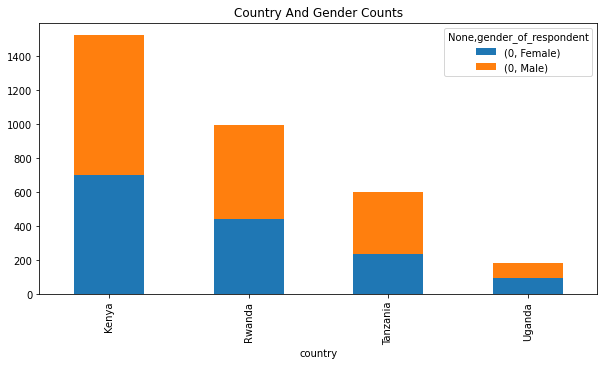

In [50]:
#A stacked visualization of the above:
visplot=datas.groupby(['country','gender_of_respondent']).size().reset_index().pivot(columns='gender_of_respondent', index='country')
visplot.plot( kind='bar', figsize=(10,5),title=('Country And Gender Counts'),stacked=True)



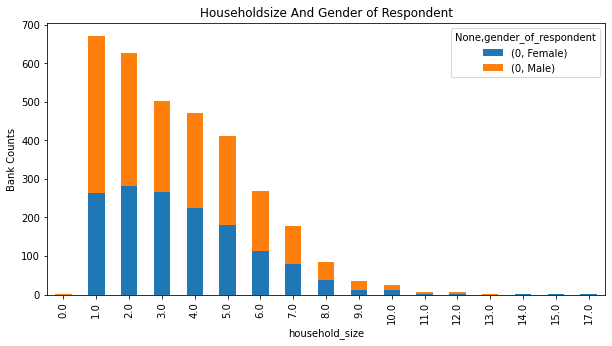

In [51]:
#A stacked visualization of household size and gender of respondent:
visplot=datas.groupby(['household_size','gender_of_respondent']).size().reset_index().pivot(columns='gender_of_respondent', index='household_size')
visplot.plot( kind='bar',figsize=(10,5),ylabel=('Bank Counts'), title=('Householdsize And Gender of Respondent'),stacked=True)

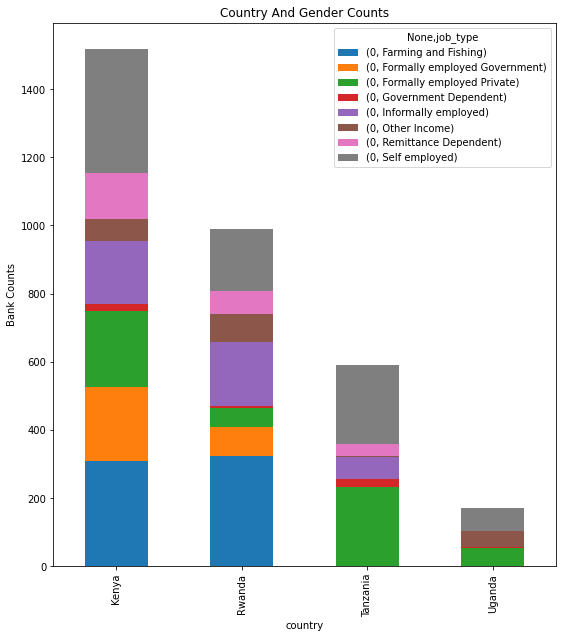

In [52]:
#A stacked visualization of job types and country:
visplot=datas.groupby(['country','job_type']).size().reset_index().pivot(columns='job_type', index='country')
visplot.plot( kind='bar', figsize=(9,10),title=('Country And Gender Counts'),ylabel=('Bank Counts'),stacked=True)

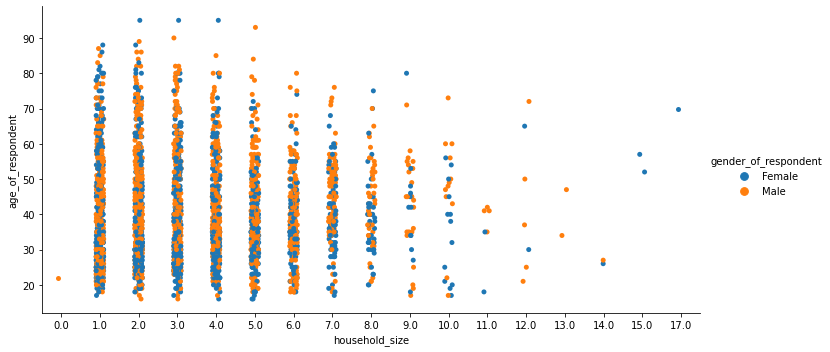

In [53]:
#Scatter plot for age and household size.With gender as hue.
#
sns.catplot(x ='household_size',y='age_of_respondent',data=datas, hue='gender_of_respondent',aspect=2)
plt.figsize=(10,5)

In [54]:
# We will now carry out Pearson's correlation coefficient .
#This will assist us in identifying the directional trends of the only two numerical variables in our dataset.
#
#Correlaion between age and household size.
#
Correlation=datas['age_of_respondent'].corr(datas['household_size'])
print('Correlation between age and household size :' , Correlation)

Correlation between age and household size : 0.022137459535731718


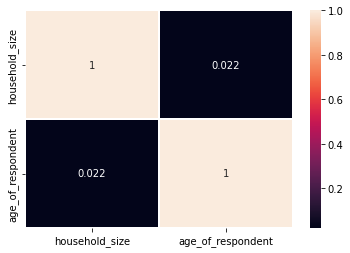

In [55]:
#A heatmap of the correlation above.
#
sns.heatmap(datas.corr(),annot=True,lw=1)

The above positive correlation and it's very small magnitude indicate that as the respondent's age increases so does their household size, the low magnitude means that they are weakly correlated.This by no means indicates causation, but just indicates that both variables move in a same direction.

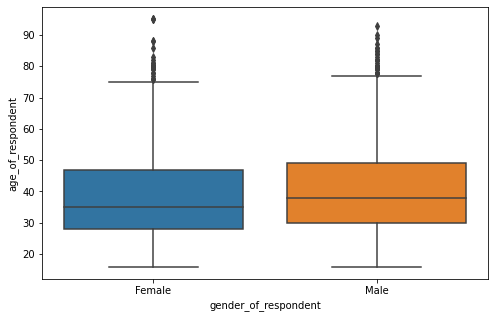

In [56]:
#We will now create boxplots for the various bivariate datas.
#For the gender and ages.
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(y='age_of_respondent',x='gender_of_respondent',ax=ax,data=datas)

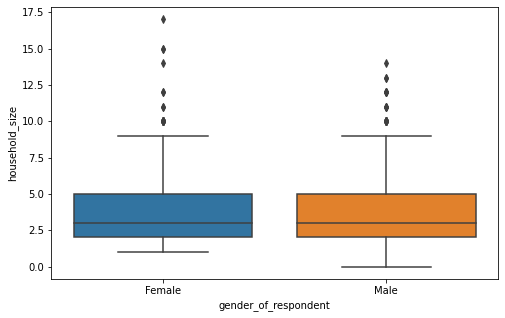

In [57]:
#For the gender and household_size.
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(y='household_size',x='gender_of_respondent',ax=ax,data=datas)

An interesting development as no female seems to be in a household size of zero.

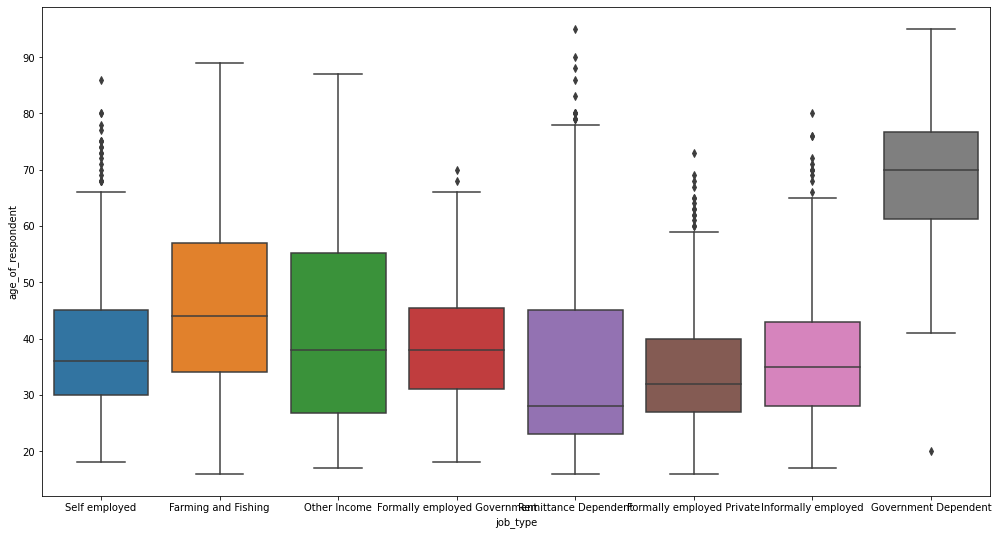

In [58]:
#For ages and job type
fig, ax = plt.subplots(figsize=(17,9))
sns.boxplot(y='age_of_respondent',x='job_type',ax=ax,data=datas)

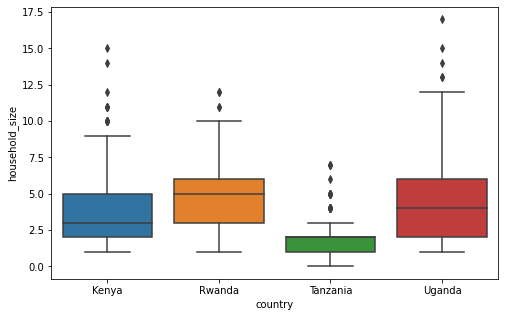

In [59]:
#For the country and household_size.
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(y='household_size',x='country',ax=ax,data=datas)

Above it is clear that Tanzania had the smallest household sizes.

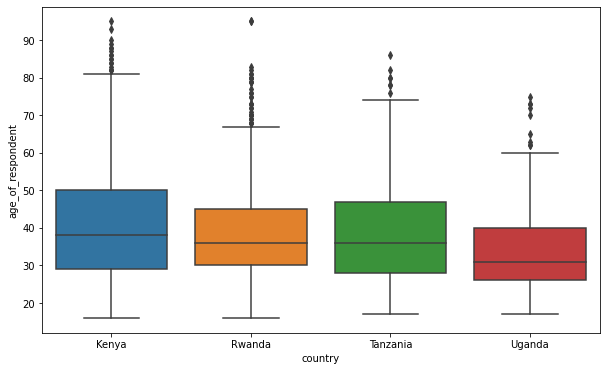

In [60]:
#For ages and country
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y='age_of_respondent',x='country',ax=ax,data=datas)

From the immediate above, it  is interesting to note that the youngest country is Uganda.

##Multivariant Analysis
We will now step into the last portion of the EDA which is the multivariant analysis. We will tackle this using the following steps:

-Regression analysisand regression analysis.

-Model building.

-Predictions and accurracy.



###Preparation.
Our data is mostly made up of Categorical variables. All of which are the percieved independent variables .i.e. they will be used to identify what greatly determines highest probability of bank access.

To do this we will have to convert these datas into quantative by the use of dummy variables.Only then will we start the first step of multivariate analysis.



In [61]:
#The independent variables.

X=data[['country', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type', 'head_of_household']]

In [62]:
X = pd.get_dummies(data=X)
X.head()

,household_size,age_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_type_Rural,location_type_Urban,cellphone_access_No,cellphone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_6,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,head_of_household_No,head_of_household_Yes
0,3.0,24.0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
1,5.0,70.0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,5.0,26.0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
3,5.0,34.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4,8.0,26.0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [63]:
Y=data['bank_access']


In [64]:
#Creating the test and train sets from the existing data
#

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.2, random_state=0)

In [65]:
# We will need to perform standard scalar normalization to normalize our feature set. 
# To do this, we execute the following code:
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
# Step 6: Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_test

array([[ 1.94405693e+00, -2.48506976e+00, -1.30110562e+00, ...,
        -2.18904864e-16, -5.79916178e-16, -4.10505371e-16],
       [ 2.24385822e+00, -2.70026311e+00,  2.89277342e+00, ...,
        -8.29527527e-16, -6.90938480e-16,  3.11139595e-16],
       [-2.29637800e+00,  3.16652043e+00,  2.09206899e+00, ...,
         4.55389856e-16,  7.14245824e-16,  2.98972320e-16],
       ...,
       [-2.40952856e+00, -1.98091160e-01,  1.12313812e+00, ...,
         7.32945613e-16, -7.56799683e-16,  1.87950017e-16],
       [-2.35582774e+00,  8.66188548e-01, -9.58160359e-02, ...,
         6.68117977e-17,  1.31378736e-16, -6.33901227e-18],
       [ 2.22415748e+00, -2.72438746e+00, -8.63395689e-01, ...,
        -5.79727347e-16, -8.29716358e-16, -6.04794401e-16]])

In [67]:
# Step 7: Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# 
explained_variance = pca.explained_variance_ratio_

In [69]:
#Using 1 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [70]:
# Training and Making Predictions
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [71]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)
Y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [72]:
#Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print('Accuracy' , accuracy_score(Y_test, Y_pred))

[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965


From above we notice the modeling ,where we used first component gives us 85% accuracy

In [77]:
#Results with all Principal Components
#
from sklearn.decomposition import PCA

pca = PCA(svd_solver='full')
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [78]:
# With all principal components the classification accuracy should again increase to 93.33%
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [79]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print('Accuracy' , accuracy_score(Y_test, Y_pred))

[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965


##Summary and end notes:
It is evident that after the processing and predictive modelling that the topic in itself yielded complex results in the sense where the choosen PCA method gave a fixed accuracy value.

###To challenge the original question:
What would addition of of a years of employment variable have resulted in?

What about  one regarding 

Clearly an addition of info on whether the individuals already had fintech services would have also affected whether they had bank accounts.